CIFAR-10 Object Recognition using Convolutional Neural Network

This notebook implements a Convolutional Neural Network (CNN)
#To classify images from the CIFAR-10 dataset and evaluates the model
Using both the test dataset and external images from the internet.

1. Load labels in python

In [1]:
import pandas as pd

# Path to your dataset folder
train_labels = pd.read_csv("cifar-10/trainLabels.csv")
print(train_labels.head())

   id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile


2. Load and visualize an image

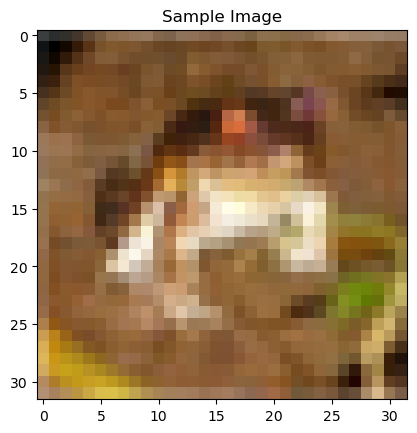

In [2]:
import matplotlib.pyplot as plt
import cv2

# Example: Load img 1.png
img = cv2.imread("cifar-10/train/1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB

plt.imshow(img)
plt.title("Sample Image")

plt.show()

3. Prepare Data for Training
* Convert labels (strings like "cat", "dog") into numeric classes (0–9).
* Normalize pixel values (/255.0).
* Split into training and validation sets.

In [3]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_labels['label'])

# Load all images into numpy array
import os

X_train = []
for i in range(len(train_labels)):
    img_path = f"cifar-10/train/{i+1}.png"
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X_train.append(img)

X_train = np.array(X_train)
print("Shape:", X_train.shape, "Labels:", y_train.shape)

Shape: (50000, 32, 32, 3) Labels: (50000,)


4. Confirm if the dataset is loaded correctly
* Randomly selects 25 images from your training set.
* Plots them in a 5×5 grid.
* Displays the class label (e.g., “cat”, “dog”, “ship”) above each image.
* Removes axes for a cleaner look.

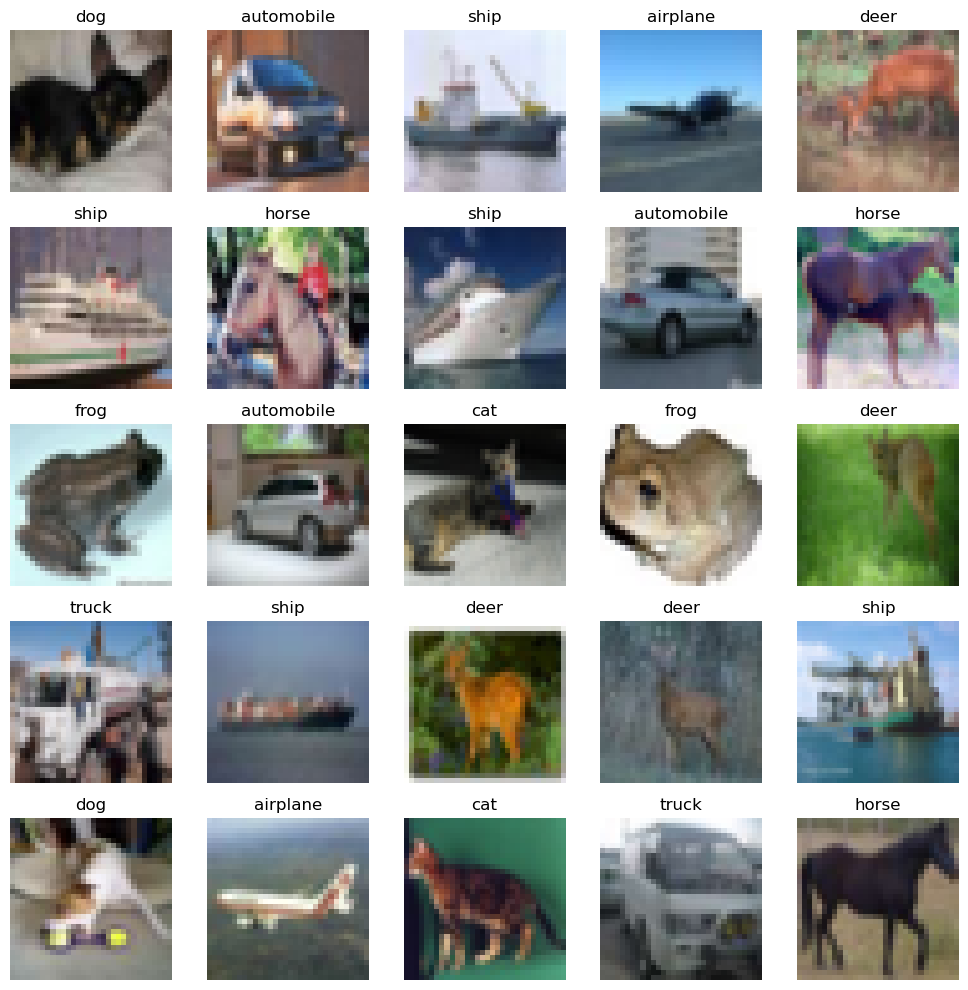

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# pick 25 random indices
indices = np.random.choice(len(X_train), 25, replace=False)

# plot 5x5 grid
plt.figure(figsize=(10,10))
for i, idx in enumerate(indices):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[idx])
    plt.title(encoder.classes_[y_train[idx]]) # show class name
    plt.axis('off')

plt.tight_layout()
plt.show()

5. Preparing dataset for Normalizing and Splitting it into training and validation sets.

Step 1: Normalize pixel Values

In [5]:
X_train = X_train.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

Step 2: Train/Validation split

keeping only ~10% of the training data aside for validation

In [6]:
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

print("Training set:", X_train_split.shape, y_train_split.shape)
print("Validation set:", X_val_split.shape, y_val_split.shape)

Training set: (45000, 32, 32, 3) (45000,)
Validation set: (5000, 32, 32, 3) (5000,)


Step 3: Convert Labels to One-Hot Encoding

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_split = to_categorical(y_train_split, num_classes=10)
y_val_split = to_categorical(y_val_split, num_classes=10)

6. CNN construction

6.1 Import libraries

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

6.2 Define the model

In [9]:
from tensorflow.keras import layers, models, Input
model = models.Sequential([
            Input(shape=(32,32,3)), # explicitly define input shape 
            layers.Conv2D(32, (3,3), activation='relu'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax') ])

6.3 Compile the model

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

6.4 Train the model

In [11]:
history = model.fit(
    X_train_split, y_train_split,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_split, y_val_split)
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4024 - loss: 1.6354 - val_accuracy: 0.4812 - val_loss: 1.4005
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.5420 - loss: 1.2866 - val_accuracy: 0.5354 - val_loss: 1.2957
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6020 - loss: 1.1323 - val_accuracy: 0.6260 - val_loss: 1.0740
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6362 - loss: 1.0345 - val_accuracy: 0.6442 - val_loss: 1.0111
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.6651 - loss: 0.9586 - val_accuracy: 0.6696 - val_loss: 0.9522
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6832 - loss: 0.9031 - val_accuracy: 0.6628 - val_loss: 0.9609
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7043 - loss: 0.8468 - val_accuracy: 0.6790 - val_loss: 0.9279
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7198 - loss: 0.8050 - val_a

6.5 Evaluate the validation set

In [12]:
val_loss, val_acc = model.evaluate(X_val_split, y_val_split)
print("Validation accuracy:", val_acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7054 - loss: 0.8724
Validation accuracy: 0.7053999900817871


7. Plot Accuracy and Loss curves

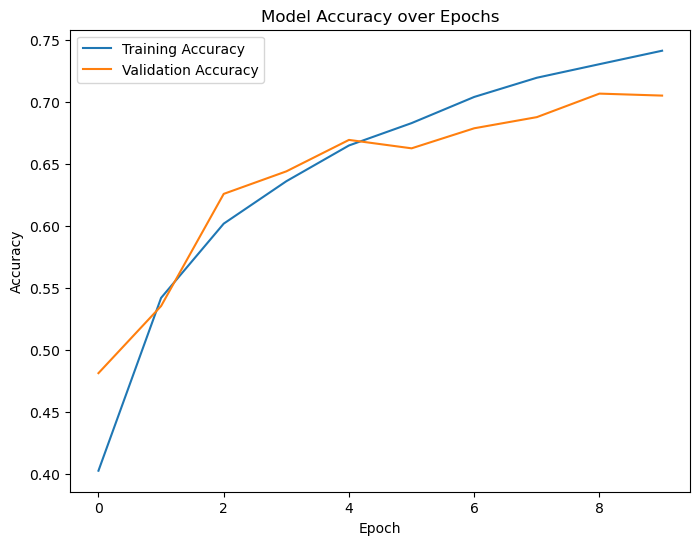

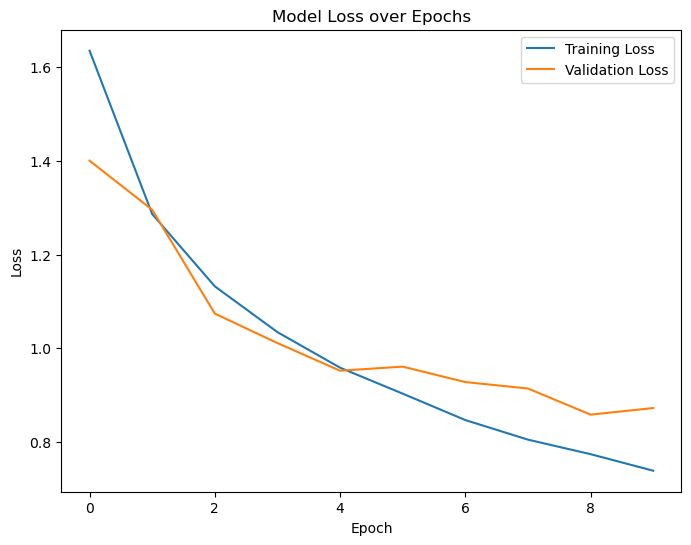

In [13]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Final testing from Internet

1. Fetching an image from internet

In [18]:
import cv2
import numpy as np

# Load image
img = cv2.imread("C:\\PersonalDrive\\IITD\\Assingment\\Project\\cifar-10\\plane.jpg")  # replace with your filename
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR → RGB
img = cv2.resize(img, (32,32))              # resize to 32x32
img = img.astype('float32') / 255.0         # normalize
img = np.expand_dims(img, axis=0)           # add batch dimension

2. Process the image and predict the result

In [19]:
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

print("Predicted class index:", predicted_class)
print("Predicted class name:", encoder.classes_[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted class index: 0
Predicted class name: airplane
